# Colaboratory

## Introduction



Some important links to keep open during the workshop – open these tabs **now**!:

- [TF documentation](https://www.tensorflow.org/api_docs/python/tf) : Use the search box (top right) to get documentation on Tensorflow's rich API.

- [solutions/](https://github.com/tensorflow/workshops/tree/master/extras/amld/notebooks/solutions) : Every notebook in the `exercises/` directory has a corresponding notebook in the `solutions/` directory.

---

Colaboratory (Colab) is a Jupyter notebook environment which allows to work with data and code in an interactive manner. You can decide where you want to run your code:

*   Using a hosted runtime provided by Google (**default**)
*   Locally using your own machine and resources

Currently, it supports Python 2.7 and Python 3.6 and comes with a set of pre-installed libraries like Tensorflow and Matplotlib but also gives you the option to install more libraries on demand. The resulting notebooks can be shared in a straightforward way.

Caveats:

*   The virtual machines used for the runtimes are **ephemeral** so make sure to safe your data in a persistent location like locally (downloading), in the Google Cloud Storage or Google Drive.
*   The service is free of use but the performance of default runtimes can be insufficient for your purposes.
*  You have the option to select a runtime with GPU or TPU support.
*  "Colaboratory is intended for interactive use. Long-running background computations, particularly on GPUs, may be stopped. [...] We encourage users who wish to run continuous or long-running computations through Colaboratory’s UI to use a local runtime." - See [Colaboratory FAQ](https://research.google.com/colaboratory/faq.html "Colaboratory FAQ")

** Getting started **

1.   Connect to a runtime now by clicking `connect` in the top right corner if you don't already see a green checkmark there.
2.   To get a better overview you might want to activate the *Table of contents* by clicking on the arrow on the left.

### Important shortcuts

Action | Colab Shortcut | Jupyter Shortcut
---|---|---
Executes current cell | `<CTRL-ENTER>` | `<CTRL-ENTER>`
Executes current cell and moves to next cell | `<SHIFT-ENTER>` | `<SHIFT-ENTER>`
Insert cell above | `<CTRL-M> <A>` | `<A>`
Append cell below | `<CTRL-M> <B>` | `<B>`
Shows searchable command palette | `<CTRL-SHIFT-P>` | `<CTRL-SHIFT-P>`
Convert cell to code | `<CTRL-M> <Y>` | `<Y>`
Convert cell to Markdown | `<CTRL-M> <M>` | `<M>`
Autocomplete | `<TAB>` | `<TAB>`
Goes from edit to "command" mode | `<ESC>` | `<ESC>`
Goes from "command" to edit mode | `<ENTER>` | `<ENTER>`
Show keyboard shortcuts | `<CTRL-M> <H>` | `<H>`
<p align="center"><b>Note:</b> On OS X you can use `<COMMAND>` instead of `<CTRL>`</p>

Give it a try!

In [0]:
# YOUR ACTION REQUIRED:
# Execute this cell first using <CTRL-ENTER> and then using <SHIFT-ENTER>.
# Note the difference in which cell is selected after execution.
print("Hello world!")

Hello world!


** What to do if you get stuck **

If you should get stuck and the documentation doesn't help you consider using additional help.

In [0]:
def xor_str(a, b):
    return ''.join([chr(ord(a[i % len(a)]) ^ ord(b[i % len(b)]))
                    for i in range(max(len(a), len(b)))])

# YOUR ACTION REQUIRED:
# Try to find the "correct value" for the variable below...
workshop_secret = 'Tensorflow rocks' #workshop_secret = '(replace me!)'
xor_str(workshop_secret, '\x03\x00\x02\x10\x00\x1f\x03L\x1b\x18\x00\x06\x07\x06K2\x19)*S;\x17\x08\x1f\x00\x05F\x1e\x00\x14K\x115\x16\x07\x10\x1cR1\x03\x1d\x1cS\x1a\x00\x13J')

# Hint: You might want to checkout the ../solutions directory
# (you should already have opened this directory in a browser tab :-)

'Welcome to the AMLD Tensorflow basics Workshop!'

### First steps

**Tensorflow version**

Make sure you are using the version: **1.12.0** or higher because we tested the notebooks against `1.12.0`

In [0]:
# Include basic dependencies and display the tensorflow version.
import tensorflow as tf
tf.__version__

'1.12.0'

**Running shell commands**

You can run shell commands directly in Colab: simply prepend the command with a **!**.

In [0]:
# Print the current working directory and list all files in it.
!pwd
!ls

/content
gdrive				ngrok-stable-linux-amd64.zip.5
ngrok				ngrok-stable-linux-amd64.zip.6
ngrok-stable-linux-amd64.zip	ngrok-stable-linux-amd64.zip.7
ngrok-stable-linux-amd64.zip.1	ngrok-stable-linux-amd64.zip.8
ngrok-stable-linux-amd64.zip.2	sample_data
ngrok-stable-linux-amd64.zip.3	tensorboard
ngrok-stable-linux-amd64.zip.4


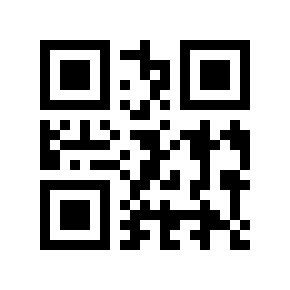

In [0]:
# Especially useful : Install new packages...
!pip install qrcode
import qrcode
qrcode.make('Colab rocks!')

**Autocompletion and docstrings**

Jupyter shows possible completions of partially typed
commands.

Try it for yourself by displaying all available `tf.` methods that start with `one`.

In [0]:
# YOUR ACTION REQUIRED:
# Set the cursor to after tf.one and press <TAB>.
tf.one_hot #tf.one

<function tensorflow.python.ops.array_ops.one_hot>

In addition, you can also display docstrings to see the function signature and possible parameters.

In [0]:
# YOUR ACTION REQUIRED:
# Set the cursor inside the () and press <TAB>.
#tf.maximum()

Alternatively, you might also inspect function details with docstrings if available by appending a "?".

In [0]:
tf.maximum?

**Note:** This also works for any other type of object as can be seen below.

In [0]:
test_dict = {'key0': 'Tensor', 'key1': 'Flow'}
test_dict?

## Runtimes

As noted in the introduction above, Colab provides multiple runtimes with different hardware accelerators:

*   CPU (default)
*   GPU
*   TPU

which can be selected by choosing the `"Runtime"` tab above and then `"Change runtime type"`.

Please be aware that selecting a new runtime will assign a new virtual machine (VM).
In general, assume that any changes you make to the VM environment including data storage are **ephemeral**. Particularly, this might require to **execute previous cells again** as their content is unknown to a new runtime otherwise. 

Let's take a closer look at one of such provided VMs.


Once we have been assigned a runtime we can inspect it further.

In [0]:
# Display how long the system has been running.
!uptime

 23:02:51 up  7:37,  0 users,  load average: 0.23, 0.14, 0.05


As can be seen, the machine has been allocated just very recently for our purposes.

**VM specifications**

In [0]:
# Display available and used memory.
!free -h
print("-"*70)
# Display the CPU specification.
!lscpu
print("-"*70)
# Display the GPU specification (if available).
!(nvidia-smi | grep -q "has failed") && echo "No GPU found!" || nvidia-smi 

              total        used        free      shared  buff/cache   available
Mem:            12G        2.4G        6.7G        5.9M        3.7G         10G
Swap:            0B          0B          0B
----------------------------------------------------------------------
Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            0
CPU MHz:             2200.000
BogoMIPS:            4400.00
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            56320K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse3

## Plotting

The notebook environment also provides options to visualize and interact with data.

We'll take a short look at the plotting/visualization libraries Matplotlib and Altair.

### Matplotlib

Matplotlib is one of the most famous Python plotting libraries and can be used to plot results within a cell's output (see [Matplotlib Introduction](https://matplotlib.org/users/intro.html "Matplotlib Introduction")).

Let's try to plot something with it.

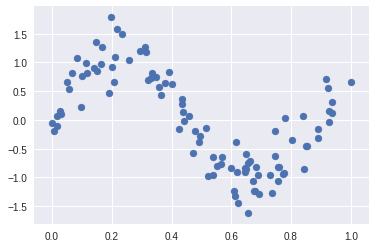

In [0]:
# Display the Matplotlib outputs within a cell's output. 
%matplotlib inline
import numpy as np
from matplotlib import pyplot
# Create a randiomized scatterplot using matplotlib.
x = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.3, size=len(x))
y = np.sin(x * 7) + noise
pyplot.scatter(x, y)

### Altair

Another declarative visualization library for Python is Altair (see [Altair: Declarative Visualization in Python](https://altair-viz.github.io/)).

Try to zoom in/out and to hover over individual data points in the resulting plot below.

In [0]:
# Load an example dataset.
from vega_datasets import data
cars = data.cars()

# Plot the dataset, referencing dataframe column names.
import altair as alt
alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color='Origin',
  tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

Chart({
  data:      Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
  0            12.0          8         307.0       130.0              18.0   
  1            11.5          8         350.0       165.0              15.0   
  2            11.0          8         318.0       150.0              18.0   
  3            12.0          8         304.0       150.0              16.0   
  4            10.5          8         302.0       140.0              17.0   
  5            10.0          8         429.0       198.0              15.0   
  6             9.0          8         454.0       220.0              14.0   
  7             8.5          8         440.0       215.0              14.0   
  8            10.0          8         455.0       225.0              14.0   
  9             8.5          8         390.0       190.0              15.0   
  10           17.5          4         133.0       115.0               NaN   
  11           11.5          8         350.0       165.0               NaN   
  12           11.0          8         351.0       153.0               NaN   
  13           10.5          8         383.0       175.0               NaN   
  14           11.0          8         360.0       175.0               NaN   
  15           10.0          8         383.0       170.0              15.0   
  16            8.0          8         340.0       160.0              14.0   
  17            8.0          8         302.0       140.0               NaN   
  18            9.5          8         400.0       150.0              15.0   
  19           10.0          8         455.0       225.0              14.0   
  20           15.0          4         113.0        95.0              24.0   
  21           15.5          6         198.0        95.0              22.0   
  22           15.5          6         199.0        97.0              18.0   
  23           16.0          6         200.0        85.0              21.0   
  24           14.5          4          97.0        88.0              27.0   
  25           20.5          4          97.0        46.0              26.0   
  26           17.5          4         110.0        87.0              25.0   
  27           14.5          4         107.0        90.0              24.0   
  28           17.5          4         104.0        95.0              25.0   
  29           12.5          4         121.0       113.0              26.0   
  ..            ...        ...           ...         ...               ...   
  376          18.6          4         112.0        88.0              27.0   
  377          18.0          4         112.0        88.0              34.0   
  378          16.2          4         112.0        85.0              31.0   
  379          16.0          4         135.0        84.0              29.0   
  380          18.0          4         151.0        90.0              27.0   
  381          16.4          4         140.0        92.0              24.0   
  382          20.5          4         151.0         NaN              23.0   
  383          15.3          4         105.0        74.0              36.0   
  384          18.2          4          91.0        68.0              37.0   
  385          17.6          4          91.0        68.0              31.0   
  386          14.7          4         105.0        63.0              38.0   
  387          17.3          4          98.0        70.0              36.0   
  388          14.5          4         120.0        88.0              36.0   
  389          14.5          4         107.0        75.0              36.0   
  390          16.9          4         108.0        70.0              34.0   
  391          15.0          4          91.0        67.0              38.0   
  392          15.7          4          91.0        67.0              32.0   
  393          16.2          4          91.0        67.0              38.0   
  394          16.4          6         181.0       110.0              25.0   
  395   

## Notebook Magics

The IPython and Colab enviroment support built-in magic commands called magics (see: [IPython - Magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html)).

In addition to default Python, these commands might be handy for example when it comes to interacting directly with the VM or the Notebook itself.



### Cell magics

Cell magics define a mode for a complete cell and are prefixed with **%%**.

Examples include:

*  **%%bash** or **%%sh**
* **%%html**
* **%%javascript**


In [0]:
%%sh
echo "This is a shell script!"
# List all running VM processes.
ps -ef
echo "Done"

This is a shell script!
UID          PID    PPID  C STIME TTY          TIME CMD
root           1       0  0 15:25 ?        00:00:00 /bin/bash -e /datalab/run.sh
root           8       1  0 15:25 ?        00:00:02 node /tools/node/bin/forever --minUptime 1000 --spinSleepTime 1000 /datalab/web/app.js
root          30       8  0 15:25 ?        00:00:11 /tools/node/bin/node /datalab/web/app.js
root          40      30  0 15:25 ?        00:00:21 /usr/bin/python2 /usr/local/bin/jupyter-notebook --ip="172.28.0.2" --port=9000 --FileContentsManager.root_dir="/" --MappingKernelManager.root_dir="/content"
root          65       0  0 15:25 ?        00:00:01 tail -n +0 -F /root/.config/Google/DriveFS/Logs/drive_fs.txt
root          79      40  1 15:26 ?        00:08:18 /usr/bin/python3 -m ipykernel_launcher -f /root/.local/share/jupyter/runtime/kernel-f114340d-6f6a-4d6f-a55b-0453c615163a.json
root          97      79  0 15:26 ?        00:00:00 /usr/bin/python3 -c from multiprocessing.semaphore_trac

In [0]:
# Embed custom HTML directly into a cell's output.
%%html
<marquee>HTML rocks</marquee>

### Line magics 

You can also make use of line magics which can be inserted anywhere at the beginning of a line inside a cell and need to be prefixed with **%**.

Examples include:


*   **%time** - display the required time to execute the current line
*   **%cd** - change the current working directory
*   **%pdb** - invoke an interactive Python debugger
* **%lsmagic** - list all available line magic and cell magic functions



For example, if you want to find out how long one specific line requires to be executed you can just prepend **%time**.


In [0]:
n = 1000000
%time list1 = [i for i in range(n)]
print("")
%time list2 = [i for i in range(int(n/2))]

CPU times: user 54.8 ms, sys: 21.2 ms, total: 76 ms
Wall time: 78.1 ms

CPU times: user 29.9 ms, sys: 4.98 ms, total: 34.9 ms
Wall time: 35.3 ms


**Note:** Some line magics like **%time** can also be used for complete cells by writing **%%time**.

In [0]:
%%time
n = 1000000
list1 = [i for i in range(n)]
list2 = [i for i in range(int(n/2))]

CPU times: user 97.7 ms, sys: 29.2 ms, total: 127 ms
Wall time: 130 ms


** Custom line magic **

You can also define your own line/cell magic in the following way.

In [0]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def mymagic(line_content, cell_content=None):
  print('line_content="%s" cell_content="%s"' % (line_content, cell_content))

In [0]:
%mymagic Howdy Alice!

line_content="Howdy Alice!" cell_content="None"


In [0]:
%%mymagic simple question
Howdy Alice!
how are you?

line_content="simple question" cell_content="Howdy Alice!
how are you?"


# ----- Optional part -----

## Data handling

There are multiple ways to provide data to a Colabs's VM environment.
> **Note:** This section only applies to Colab.
> Jupyter has a file explorer and other options for data handling.

The options include:
*   Uploading files from the local file system.
* Connecting to Google Cloud Storage (explained below).
*   Connecting to Google Drive (see: [Snippets: Drive](https://colab.sandbox.google.com/notebooks/snippets/drive.ipynb); will be used in the next Colabs).

**Uploading files from the local file system**

In [0]:
# Snippet as provided in https://colab.research.google.com/notebooks/io.ipynb
# YOUR ACTION REQUIRED:
# Upload any test file to the target system.
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
# The file should now appear in the current working directory.
!pwd
!ls -l

/content
total 62948
drwx------ 4 root root     4096 Jan 25 15:27 gdrive
-rwxr-xr-x 1 root root 16117632 Jul 15  2017 ngrok
-rw-r--r-- 1 root root  5363700 Jan 25 15:28 ngrok-stable-linux-amd64.zip
-rw-r--r-- 1 root root  5363700 Jan 25 15:29 ngrok-stable-linux-amd64.zip.1
-rw-r--r-- 1 root root  5363700 Jan 25 15:29 ngrok-stable-linux-amd64.zip.2
-rw-r--r-- 1 root root  5363700 Jan 25 15:30 ngrok-stable-linux-amd64.zip.3
-rw-r--r-- 1 root root  5363700 Jan 25 15:31 ngrok-stable-linux-amd64.zip.4
-rw-r--r-- 1 root root  5363700 Jan 25 21:02 ngrok-stable-linux-amd64.zip.5
-rw-r--r-- 1 root root  5363700 Jan 25 21:02 ngrok-stable-linux-amd64.zip.6
-rw-r--r-- 1 root root  5363700 Jan 25 21:06 ngrok-stable-linux-amd64.zip.7
-rw-r--r-- 1 root root  5363700 Jan 25 21:10 ngrok-stable-linux-amd64.zip.8
drwxr-xr-x 1 root root     4096 Jan  8 17:15 sample_data
drwxr-xr-x 5 root root     4096 Jan 25 21:14 tensorboard


In [0]:
# A file can also be downloaded by using:
from google.colab import files
with open('test_file.txt', 'w') as f:
  f.write('test content')
files.download('test_file.txt')

** Connecting to Google Cloud Storage **

[Google Cloud Storage](https://cloud.google.com/storage/?hl=de) (GCS) is a cloud file storage service with a RESTful API.

We can utilize it to store our own data or to accceess data provided by the following identifier:


```
gs://[BUCKET_NAME]/[OBJECT_NAME]
```

We'll use the data provided in **gs://amld-datasets/zoo_img** as can be seen below.

Before we can interact with the cloud environment, we need to grant permissions accordingly (also see [External data: Cloud Storage](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=S7c8WYyQdh5i)).

In [0]:
from google.colab import auth
auth.authenticate_user()

List a subset of the contained files using the [gsutil tool](https://cloud.google.com/storage/docs/gsutil?hl=en).

In [0]:
!gsutil ls gs://amld-datasets/zoo_img | head

gs://amld-datasets/zoo_img/counts.json
gs://amld-datasets/zoo_img/eval-00000-of-00100
gs://amld-datasets/zoo_img/eval-00001-of-00100
gs://amld-datasets/zoo_img/eval-00002-of-00100
gs://amld-datasets/zoo_img/eval-00003-of-00100
gs://amld-datasets/zoo_img/eval-00004-of-00100
gs://amld-datasets/zoo_img/eval-00005-of-00100
gs://amld-datasets/zoo_img/eval-00006-of-00100
gs://amld-datasets/zoo_img/eval-00007-of-00100
gs://amld-datasets/zoo_img/eval-00008-of-00100


Conveniently, TensorFlow natively supports multiple file systems such as:

*   GCS - Google Cloud Storage
*   HDFS - Hadoop
*   S3 - Amazon Simple Storage

An example for the GCS filesystem can be seen below.

In [0]:
# Note: This cell hangs if you forget to call auth.authenticate_user() above.
import tensorflow as tf
tf.gfile.Glob('gs://amld-datasets/zoo_img/*')[:10]

['gs://amld-datasets/zoo_img/counts.json',
 'gs://amld-datasets/zoo_img/eval-00000-of-00100',
 'gs://amld-datasets/zoo_img/eval-00001-of-00100',
 'gs://amld-datasets/zoo_img/eval-00002-of-00100',
 'gs://amld-datasets/zoo_img/eval-00003-of-00100',
 'gs://amld-datasets/zoo_img/eval-00004-of-00100',
 'gs://amld-datasets/zoo_img/eval-00005-of-00100',
 'gs://amld-datasets/zoo_img/eval-00006-of-00100',
 'gs://amld-datasets/zoo_img/eval-00007-of-00100',
 'gs://amld-datasets/zoo_img/eval-00008-of-00100']

## Snippets

Finally, we can take a look at the Snippets support in Colab.
> If you're using Jupyter please see [Jupyter contrib nbextensions - Snippets menu](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/nbextensions/snippets_menu/readme.html) as this is not natively supported.

Snippets are a way to quickly "bookmark" pieces of code or text that you might want to insert into specific cells.






In [0]:
# YOUR ACTION REQUIRED:
# Explore existing snippets by going to the `Code snippets` section.
# You can either select it on the left sidebar next to `Table of contents` tab
# or by pressing `<CTRL><ALT><P>` (or `<COMMAND><OPTION><P>` for OS X).

### Create your own snippets



In [0]:
print("Example snippets file:\n\t{}".format(
    "https://colab.research.google.com/drive/1OFSjEmqC-UC66xs-LR7-xmgkvxYTrAcN"))
# YOUR ACTION REQUIRED:
# Visit the following resulting link to create a small test snippet on your own.
# 1) Add a markdown cell with a title like # TEST SNIPPET
# 2) Add a code cell
print("Create your own snippets in a new Colab at:\n\t{}".format(
    "https://colab.research.google.com/notebook#create=true&language=python3"))

Example snippets file:
	https://colab.research.google.com/drive/1OFSjEmqC-UC66xs-LR7-xmgkvxYTrAcN
Create your own snippets in a new Colab at:
	https://colab.research.google.com/notebook#create=true&language=python3


In [0]:
from google.colab import snippets
# YOUR ACTION REQUIRED:
# Register a snippets file by providing the Colab URL below.
# Example:
# snippets.register('https://colab.research.google.com/drive/1OFSjEmqC-UC66xs-LR7-xmgkvxYTrAcN')
# YOUR ACTION REQUIRED: Add the URL to your own snippets file.
#snippets.register()

Once you've registered the Snippets, they should be available under the `"Code snippets"` tab.

## Forms

You can simplify cells by hiding their code and displaying a form instead.


**Note:** You can display or hide the code by double clicking the form which might be on the right side.

In [0]:
#@title Execute me

# Hidden cell content.
print("Double click the cell to see its content.")


Double click the cell to see its content.


In [0]:
# Form example mostly taken from "Adding form fields" Snippet.
#@title Example form
#@markdown Specify some test data and execute this cell.

string_type = 'test_string'  #@param {type: "string"}
slider_value = 145  #@param {type: "slider", min: 100, max: 200}
number = 1339  #@param {type: "number"}
date = '2019-01-26'  #@param {type: "date"}
pick_me = "a"  #@param ['a', 'b', 'c']
#@markdown ---
print("Submitted data:")
print(string_type, slider_value, number, date, pick_me)

Submitted data:
test_string 145 1339 2019-01-26 a


## Interactive debugging

An example of an IPython tool that you can utilize is the interactiver debugger 
provided inside an IPython environment like Colab.

For instance, by using **%pdb on**, you can automatically trigger the debugger on exceptions to further analyze the state.

Some useful debugger commands are:

Description | Command
---|---|---
**h**(elp) | Display available commands
**p**(rint) `x` | Show content of object `x`
**w**(here) | Show current instruction pointer position
**q**(uit) | Leave the debugger

In [0]:
# YOUR ACTION REQURIED:
# Execute this cell, print the variable contents of a, b and exit the debugger.
%pdb on
a = 67069 / 47 - 0x5a
b = a - 0x539
#c = a / b  # Will throw exception.

Automatic pdb calling has been turned ON


We'll not dive further into debugging but it's useful to know that this option exists.

Please see [Python Docs - pdb The Python Debugger](https://docs.python.org/2/library/pdb.html) for more information.

## A Word of Warning

While notebook environments like Colab/Jupyter provide many benefits, they also come with some caveats that you should be aware of.
One example is that you might quickly execute cells in a wrong order leading to unexpected behavior.

If you're interested in more examples feel free to take a look at:

[Youtube - I don't like notebooks by Joel Grus](https://www.youtube.com/watch?v=7jiPeIFXb6U) (duration ~56 minutes)